# Primera Entrega
---
## Caso: Predicción de unidades vendidas anualmente en videojuegos

## Abstract

El siguiente trabajo tiene como propósito dar una aproximación inicial a una solución para un problema de negocios, dando énfasis a la generación de un futuro modelo predictivo. 

Se presenta la definición del contexto comercial del problema que se quiere dar solución, donde el foco principal es la predicción de ventas de un videojuego por desarrollar. Esto, con el fin de lograr una asignación de presupuesto suficiente para el desarrollo del proyecto.

Para solucionar el problema comercial propuesto, se define que la solución es generar un modelo predictivo que logre predecir las unidades de ventas del proyecto en cuestión.

Mediante el contexto analítico se muestra cómo se presenta el dataset a utilizar, sus características y cómo se debería tratar para poder servir como input en el modelo predictivo de ventas.

Finalmente se realiza un análisis exploratorio de datos, donde se ve el comportamiento de distintas variables y cómo estás afectarían a la predicción de ventas. En base a esto, se van respondiendo diversas preguntas que van surgiendo a medida que avanza el análisis, y al mismo tiempo, se van validando hipótesis de distintos insights para terminar con una conclusión final de estas.


## Definición de objetivo

A lo largo del tiempo se ha visto un aumento exhaustivo en las ventas de videojuegos. El desarrollo de esta industria se ha visto marcado por una fuerte evolución tanto comercialmente como artísticamente. Día a día, nuevos proyectos son desarrollados por equipos multidisciplinarios con el fin de lanzar al mercado una obra que sea exitosa entre los consumidores. 

Sin embargo, no todas las creaciones llegan a tener éxito y son muchos los desarrolladores que deciden abandonar la industria debido a esto. Por esta razón, el objetivo de este trabajo investigativo es determinar que factores influyen mayoritariamente en las ventas de videojuegos y, en base a eso, poder generar un modelo predictivo de ventas.


## Contexto Comercial

La gerencia de Administración y Finanzas de cierta compañía desarrolladora de videojuegos esta evaluando el presupuesto a asignar a un nuevo videojuego. Usted como miembro del equipo del equipo de Desarrollo de Proyectos debe evaluar la factibilidad económica del nuevo proyecto. Para eso, le encargan a poder determinar la proyección de ventas totales a futuro en base a un modelo. 

El modelo debe considerar cuánto vendería el videojuego en distintas plataformas, ya que de esto depende si se asigna presupuesto adicional para desarrollar *ports* a otras consolas. Actualmente usted dispone de datos sobre ventas de distintos videojuegos desde 1980 hasta 2016.

## Problema Comercial

Su tarea es **generar un modelo predictivo que permita estimar las ventas futuras de un videojuego con ciertas características definidas.**

## Contexto Analítico

Para poder diseñar el modelo predictivo logre apoyar la determinación del presupuesto, usted dispone de un dataset con mas de 100.000 videojuegos de distintas plataformas. Este dataset, como se dijo anteriormente, comprende datos desde 1980 hasta 2016. 

Este dataset considera, además, datos relacionados a la puntuación realizada por la crítica especializada y consumidores de videojuegos que son usuarios en Metacritic, sitio reconocido de críticas de videojuegos.

Sin embargo, no todos los videojuegos incluidos tienen la data completa, por lo que será tarea usted el determinar qué variables son relevantes para el problema de negocios y si es necesario realizar una agrupación en base a alguna variable o unas variables en particular.


## Análisis Exploratorio de Datos (EDA)

In [1]:
# Llibrerías a utilizar
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [2]:
# Importamos el dataset
vgamesales_url = 'https://raw.githubusercontent.com/jbeltrang/datasets-ch/main/Video_Games_Sales_as_at_22_Dec_2016.csv'
vgamesales = pd.read_csv(vgamesales_url)
vgamesales

# Hacemos un dataframe trabajable y limpiamos la data que sea mayor al 2016
vgamesales_df = vgamesales
vgamesales_df = vgamesales_df.loc[vgamesales_df['Year_of_Release'] <= 2016]
vgamesales_df = vgamesales_df.dropna(subset=['Year_of_Release'])

### Análisis inicial del dataset

---

#### Descripción del Dataset
Este dataset incluye datos de más de 100.000 videojuegos de distintas plataformas desde 1980 hasta 2016. Dentro de la data que contiene está la plataforma, año de lanzamiento, ventas totales, puntaje de crítica, desarrollado, rating, entre otros.

*Fuente:*

[Kaggle: Video Game Sales with Ratings](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

#### Descripción de Variables
| Columna | Descripción |
| --- | --- |
| Rank | Ranking de las ventas promedio |
| Name | Nombre del videojuego |
| Platform | Plataforma de lanzamiento del videojuego (PC, PS4, etc.) |
| Year | Año de lanzamiento del videojuego |
| Genre | Género del videojuego |
| Publisher | Editor del videojuego |
| NA_Sales | Ventas en Norteamérica (en millones) |
| EU_Sales | Ventas en Europa (en millones) |
| JP_Sales | Ventas en Japón (en millones) |
| Other_Sales | Ventas en el resto del mundo (en millones) |
| Global_Sales | Ventas totales a nivel mundial. |
| Critic_score | Puntaje agregado del staff de Metacritic |
| Criticcount | Número de críticas usadas para obtener el puntaje del staff |
| User_score | Puntaje asignado por los suscriptores de Metacritic |
| Usercount | Número de usuarios que dieron puntaje de crítica |
| Developer | Desarrollador |
| Rating | Rating asignado por la ESRB |

In [4]:
# Tipos de variables
vgamesales_df_types = vgamesales_df.dtypes
print("Tipos de variables:\n")
print(vgamesales_df_types)

## Identificación de cantidad de NaN por columna
nan_count = vgamesales_df.isna().sum() 
print("\nNaN por columna:\n")
print(nan_count)

# Análisis Estadístico de variables numéricas

## Seleccionamos solo las columnas numéricas
vgamesales_numeric_df = vgamesales_df.select_dtypes(include=[np.number])

## Cálculo de la media por columna
mean = vgamesales_numeric_df.mean()
print("\nMedia:\n")
print(mean)

## Cálculo de la mediana por columna
median = vgamesales_numeric_df.median()
print("\nMediana:\n")
print(median)

## Cálculo de la desviación estándar por columna
standard_deviation = vgamesales_numeric_df.std()
print("\nDesviación estándar:\n")
print(standard_deviation)

## Cálculo de la varianza por columna
variance = vgamesales_numeric_df.var()
print("\nVarianza:\n")
print(variance)

## Cálculo de otros estadísticos relevantes
print("\nMínimo:\n")
print(vgamesales_numeric_df.min())

print("\nMáximo:\n")
print(vgamesales_numeric_df.max())

print("\nQuantiles:\n")
print(vgamesales_numeric_df.quantile([0.25, 0.5, 0.75]))

Tipos de variables:

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

NaN por columna:

Name                  2
Platform              0
Year_of_Release       0
Genre                 2
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8463
Critic_Count       8463
User_Score         6607
User_Count         8983
Developer          6540
Rating             6678
dtype: int64

Media:

Year_of_Release    2006.484616
NA_Sales              0.264089
EU_Sales              0.145945
JP_Sales       

### Exploración inicial del dataset

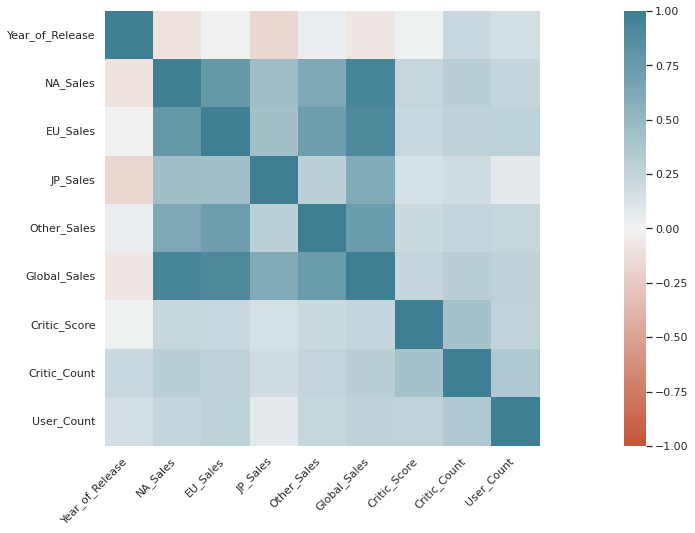

In [ ]:
# Hacemos un heatmap para determinar algunas correlaciones relevantes que apoyen lo realizado en la entrega anterior
corr = vgamesales_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Preguntas e Interpretación
En base al heatmap de correlación anterior, podemos determinar que las variables que tienen mayor correlación entre si son las variables de ventas. Esto era esperable, considerando que las ventas regionales son una desagregación de las ventas globales. De ahí se puede desprender que las ventas de la región norteamericana y la región europea son las que tienen una mayor correlación respecto a las ventas globales.

Sería oportuno, para otro tipo de análisis, considerar solamente las ventas globales, ya que estas se comportan de manera similar a las ventas regionales al correlacionarlas con el resto de variables.

**Pregunta**: ¿Qué variables o variables de ventas debemos considerar?

**Respuesta**: Esto dependerá del enfoque comercial al cuál apunte el proyecto. Si se trata de un proyecto enfocado a un mercado específico, ahí sería relevante evaluar cómo esas ventas de forma aislada (en una región específica) se correlacionan con subvariables generadas (como podría ser el género del videojuego).


### Insights y Preguntas

Índice de correlación: 0.78
Resumen estadístico:
        Global_Sales
count     37.000000
mean     238.405135
std      207.670245
min       11.380000
25%       49.390000
50%      200.980000
75%      361.240000
max      671.790000


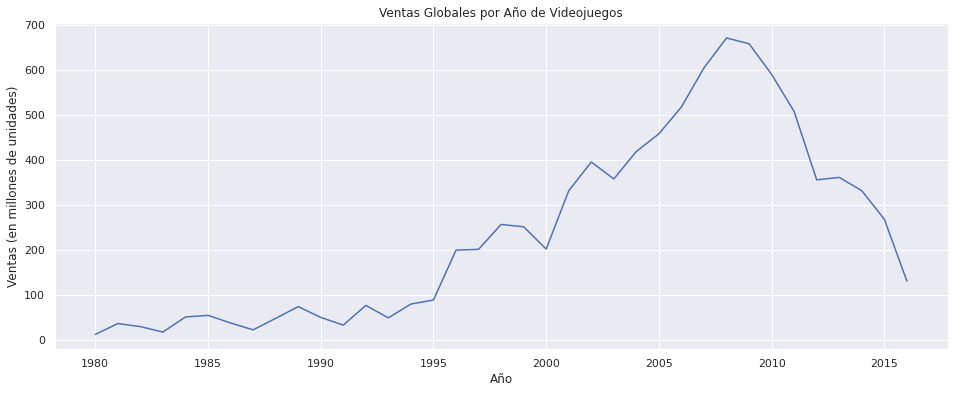

In [ ]:
# Hacemos un subset
vgamesales_dfg1 = vgamesales_df

# Definimos el año de lanzamiento como índice
vgamesales_dfg1.index = vgamesales_dfg1['Year_of_Release']
vgamesales_dfg1 = vgamesales_dfg1.drop('Year_of_Release', axis='columns')

# Agrupamos y sumamos las ventas globales por año
vgamesales_dfg1 = vgamesales_dfg1.groupby('Year_of_Release')['Global_Sales'].sum()
vgamesales_dfg1 = pd.DataFrame(vgamesales_dfg1)

# Definimos los ejes
x = vgamesales_dfg1.index
y = vgamesales_dfg1['Global_Sales']

# Definimos fig y ax
fig, ax = plt.subplots(figsize=(16, 6))

# Graficamos
ax.plot(x, y, label='Ventas Globales de Videojuegos por Año ')
ax.set_xlabel('Año')  				
ax.set_ylabel('Ventas (en millones de unidades)')
ax.set_title('Ventas Globales de Videojuegos por Año')

# Incorporamos el índice de correlación y el resumen estadístico
print('Índice de correlación:',round(np.corrcoef(vgamesales_dfg1.Global_Sales, vgamesales_dfg1.index)[0,1],2))
print('Resumen estadístico:\n',vgamesales_dfg1.describe())

#### Preguntas e Interpretación
En base a la nueva información, se puede observar que existe una correlación positiva de alrededor de un 78% entre las ventas globales y el año de lanzamiento de los videojuegos. **Esto sugiere que, para la generaciónde un modelo predictivo de ventas, el año de lanzamiento se convierte en un factor importante a cosiderar**. 

La lógica detrás que podría explicar este fenómeno sería que el factor del año de lanzamiento captura, en cierta medida, el poder adquisitivo de los consumidores en distintos periodos. También podría ser explicado por el aumento en la popularidad de los videojuegos como un medio de entretenimiento más masivo a lo largo del tiempo.

**Pregunta**: ¿Es determinante en las ventas proyectadas el historial global de ventas?

**Respuesta**: Sí, pero esta respuesta debe tener ciertas consideraciones. 

En primer lugar, el gráfico no muestra la distribución de ventas por año, por lo que la presencia de outliers está incorporada, pudiendo generar desvíos importantes en algunos años.

Y en segundo lugar, no se captura el efecto precio. Los aumentos en los precios de videojuegos por concepto de inflación a lo largo del tiempo es un efecto capturado de forma indirecta en las ventas de videojuegos. Por lo tanto, si pensamos en un escenario que considere las ventas en millones de dolares, el gráfico se podría comportar de otra manera. Sin embargo, dado el concepto comercial, nos concentraremos solamente en las ventas en términos de unidades. 



Resumen estadístico:
        Global_Sales
count     12.000000
mean     734.880833
std      472.776732
min      172.850000
25%      351.165000
50%      757.320000
75%      958.595000
max     1717.620000


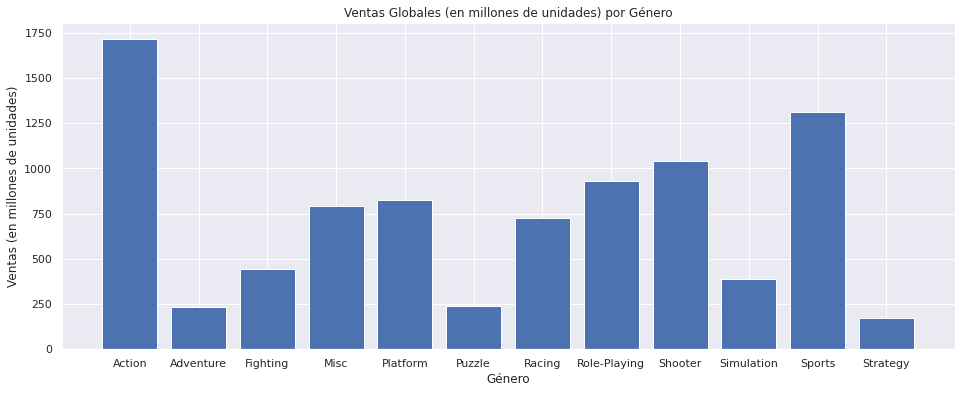

In [ ]:
# Hacemos un subset
vgamesales_dfg2 = vgamesales_df

# Definimos el género como índice
vgamesales_dfg2.index = vgamesales_dfg2['Genre']
vgamesales_dfg2 = vgamesales_dfg2.drop('Genre', axis='columns')

# Agrupamos y sumamos las ventas globales por Género
vgamesales_dfg2 = vgamesales_dfg2.groupby('Genre')['Global_Sales'].sum()
vgamesales_dfg2 = pd.DataFrame(vgamesales_dfg2)

# Graficamos
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(vgamesales_dfg2.index, vgamesales_dfg2['Global_Sales'])
ax.set_title('Ventas Globales (en millones de unidades) por Género')
ax.set_ylabel('Ventas (en millones de unidades)')
ax.set_xlabel('Género')

# Incorporamos el resumen estadístico
print('Resumen estadístico:\n',vgamesales_dfg2.describe())

#### Preguntas e Interpretación
Se puede apreciar que existen géneros de videojuegos que resultan más exitosos que otros. Esto sugiere que existe una alta probabilidad de que un juego de género acción vaya a tener más ventas que un videojuego de estrategia. Ahora, este análisis deja de lado la posibilidad de que a través del tiempo los consumidores hayan cambiado sus gustos y preferencias, por lo que se requiere un análisis más exhaustivo respecto a esto.

**Pregunta**: ¿Es relevante el género del videojuego considerando el problema comercial?

**Respuesta**: Sí, dado que existen géneros que demuestran ser de nicho al no tener tantas ventas en comparación a otros géneros. Teniendo esto en cuenta, es muy probable que se otorguen más recursos al desarrollo de videojuegos de acción que a videojuegos de puzzles, ya que los retornos esperados son mayores considerando las unidades totales que se pronosticarían.

Resumen estadístico:
        Global_Sales
count      8.000000
mean     749.336250
std      928.368294
min        0.030000
25%        1.907500
50%      322.765000
75%     1465.482500
max     2408.670000


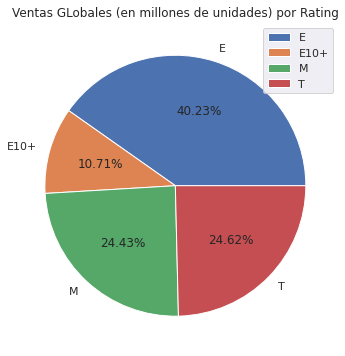

In [ ]:
# Hacemos un subset
vgamesales_dfg3 = vgamesales_df

# Definimos el género como índice
vgamesales_dfg3.index = vgamesales_dfg3['Rating']
vgamesales_dfg3 = vgamesales_dfg3.drop('Rating', axis='columns')

# Agrupamos y sumamos las ventas globales por Género
vgamesales_dfg3 = vgamesales_dfg3.groupby('Rating')['Global_Sales'].sum()
vgamesales_dfg3 = pd.DataFrame(vgamesales_dfg3)

# Dejamos el Top 4 dado que el porcentaje restante es poco considerable 
# Establecemos como parámetro comparativo que las ventas sean mayores a 5 millones de unidades
vgamesales_dfg3top = vgamesales_dfg3.loc[vgamesales_dfg3['Global_Sales'] > 5]

# Graficamos
fig, ax = plt.subplots(figsize =(16,6))
ax.pie(vgamesales_dfg3top['Global_Sales'], labels = vgamesales_dfg3top.index,autopct='%1.2f%%')
ax.set_title('Ventas GLobales (en millones de unidades) por Rating')
ax.legend()

# Incorporamos el resumen estadístico
print('Resumen estadístico:\n',vgamesales_dfg3.describe())

#### Preguntas e Interpretación
El gráfico muestra que existe una distribución bastante marcada en términos de Rating. Se puede apreciar que la mayor parte del mercado se encuentra entre E, T y M. Esto sugiere que los desarrolladores de videojuegos exitosos se enfocan en estas clasificaciones a la hora de desarrollar sus videojuegos. Lo cual, puede asegurar cierto nivel de éxito en ventas.

**Pregunta**: ¿Qué clasificación de audiencia es la más recomendable?

**Respuesta**: Considerando la información porporcionada por el gráfico, lo más recomendable sería que el proyecto se tratase de un videojuego con clasificación de audicencia E, ya que da cierta base para asegurar un nivel de ventas que logren convencer al equipo encargado de la asignación de presupuesto a que se disponga de un un mayor presupuesto para el proyecto. 

Es necesario recalcar que la clasificación de audiencia es algo que se realiza post desarrollo de un videojuego, por lo que su definición es algo relevante en la definición del proyecto, pero se hace efectiva de forma posterior. Sin embargo, es relevante para la estimación de ventas futuras.

Índice de correlación: 0.57
Resumen estadístico:
        Year_of_Release     NA_Sales     EU_Sales     JP_Sales  Other_Sales  \
count      6894.000000  6894.000000  6894.000000  6894.000000   6894.00000   
mean       2007.482303     0.390920     0.234517     0.063867      0.08200   
std           4.236401     0.963231     0.684214     0.286461      0.26862   
min        1985.000000     0.000000     0.000000     0.000000      0.00000   
25%        2004.000000     0.060000     0.020000     0.000000      0.01000   
50%        2007.000000     0.150000     0.060000     0.000000      0.02000   
75%        2011.000000     0.390000     0.210000     0.010000      0.07000   
max        2016.000000    41.360000    28.960000     6.500000     10.57000   

       Global_Sales  Critic_Score  Critic_Count   User_Score    User_Count  
count   6894.000000   6894.000000   6894.000000  6894.000000   6894.000000  
mean       0.771487     70.258486     28.842472     7.182332    174.392370  
std        1.954

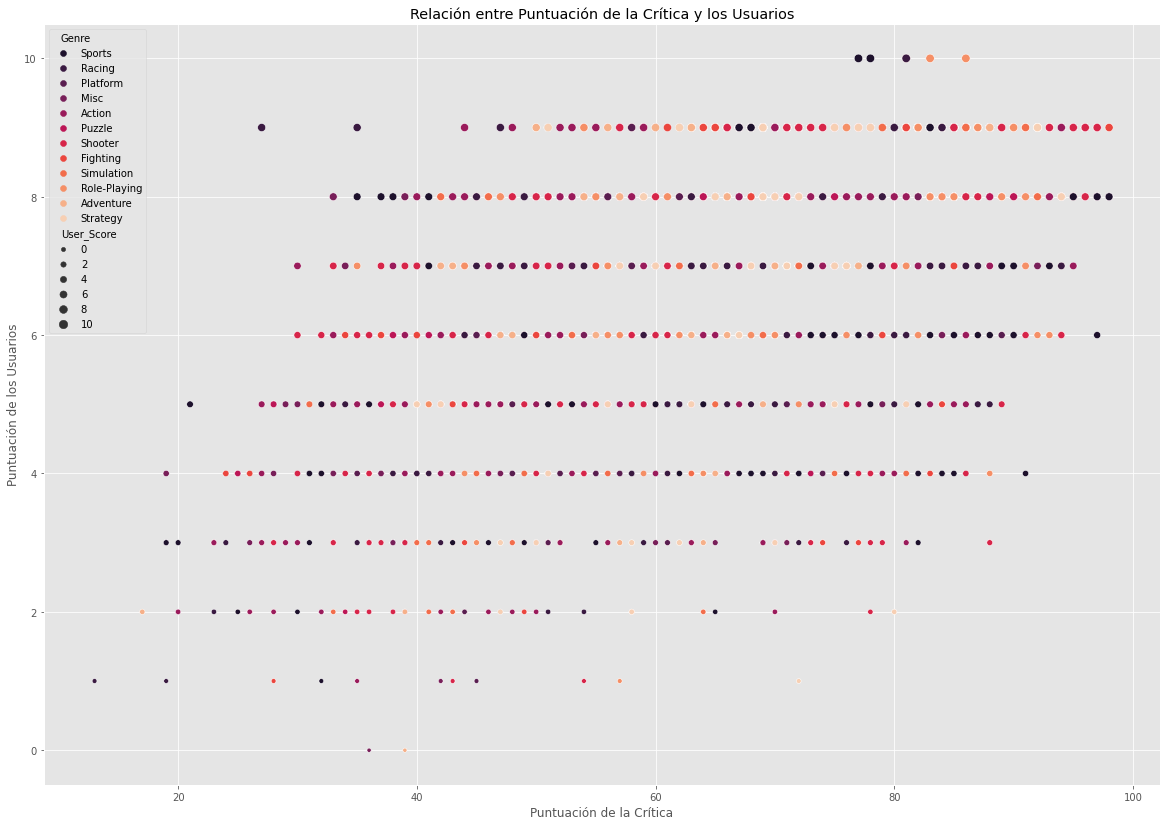

In [ ]:
# Definimos un subset sin NaN en User_Score y Critic_Score
vgamesales_dfg4 = vgamesales_df.loc[vgamesales['User_Score'] != 'tbd']
vgamesales_dfg4 = vgamesales_dfg4.dropna(subset=['User_Score', 'Critic_Score'])
vgamesales_dfg4 = vgamesales_dfg4.astype({'User_Score':'float'})

# Redondeamos User_Score para obtener un panorama más general
vgamesales_dfg4 = vgamesales_dfg4.round({"User_Score":0})

# Graficamos
f, axs = plt.subplots(figsize=(20, 14))
sns.scatterplot(data=vgamesales_dfg4, x="Critic_Score", y="User_Score", hue="Genre", palette='rocket', size="User_Score")
plt.xlabel("Puntuación de la Crítica")
plt.ylabel("Puntuación de los Usuarios")
plt.title("Relación entre Puntuación de la Crítica y los Usuarios")

# Incorporamos el índice de correlación y el resumen estadístico
print('Índice de correlación:',round(np.corrcoef(vgamesales_dfg4.User_Score, vgamesales_dfg4.Critic_Score)[0,1],2))
print('Resumen estadístico:\n',vgamesales_dfg4.describe())

#### Preguntas e Interpretación
Se puede apreciar que la crítica de los usuarios no tiene una tendencia clara hacia algún tipo de género en específico, al igual que la crítica realizada por especialistas. Esto sugiere que probablemente no exista una correlación entre estas 3 variables. Sin embargo si se observa que los títulos con mejores puntuaciones de ambos actores suele tener una mayor cantidad de críticas por aprte de los usuarios, tal y como se aprecia con el tamaño de los puntos en el gráfico, los cuales son más grandes al acercarse al acercarse a la parte superior derecha.

También se puede observar que no existe una correlación muy marcada entre la crítica de los usuarios y la crítica especializada, lo cual no permite que una variable absorba a la otra, por lo que la inclusión de ambas variables puede resultar útil a la hroa de determinar ventas futuras.

**Pregunta**: ¿Es relevante los puntajes de crítica para estimar las ventas?

**Respuesta**: El análisis anterior no incorpora las ventas globales, por lo que no es posible dar una respuesta clara al respecto. Sin embargo, dado que la crítica es un efecto posterior al desarrollo de un videojuego y dependiente de factores subjetivos no debería ser relevante para la estimación de ventas. Su verdadero aporte sería cuando ya esté en comercialización el videojuego para generar acciones de marketing que apoyen el mantenimiento de un nivel de ventas definido.

Resumen estadístico:
        Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16446.000000  16446.000000  16446.000000  16446.000000   
mean       2006.484616      0.264089      0.145945      0.078479   
std           5.877050      0.818416      0.506696      0.311082   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16446.000000  16446.000000   7983.000000   7983.000000   7463.000000  
mean       0.047593      0.536361     68.994363     26.441313    163.015141  
std        0.187994      1.558610     13.920060     19.008136    563.863327  
min        0.000000      0.010000     13.000000      

<Figure size 432x288 with 0 Axes>

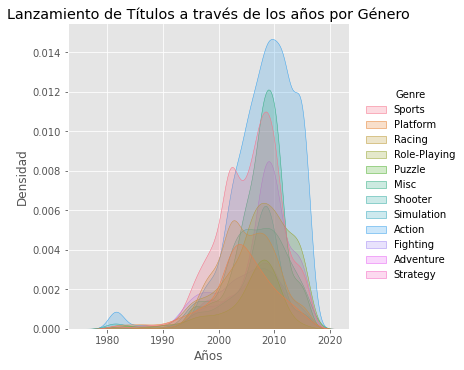

In [ ]:
# Hacemos un subset
vgamesales_dfg5 = vgamesales

# Limpiamos la data que sea mayor al 2016
vgamesales_dfg5 = vgamesales_dfg5.loc[vgamesales_dfg5['Year_of_Release'] <= 2016]
vgamesales_dfg5 = vgamesales_dfg5.dropna(subset=['Year_of_Release'])

# Graficamos
plt.figure()
ax = sns.displot(data=vgamesales_dfg5, x='Year_of_Release', kind='kde', hue='Genre', fill=True)
ax.set(xlabel='Años', ylabel='Densidad', title='Lanzamiento de Títulos a través de los años por Género')

# Incorporamos el resumen estadístico
print('Resumen estadístico:\n',vgamesales_dfg5.describe())

#### Preguntas e Interpretación
El gráfico muestra que a través de los años hubo un auge importante en el lanzamiento de videojuegos en algunos géneros en específico. Se destaca de manera especial el caso del género de acción, donde se aprecia una preponderancia importante en los últimos años. Esto puede resultar muy relevante considerando que una mayor competencia puede afectar las ventas de un videojuego en particular.

**Pregunta**: ¿Qué género es más probable que tenga mayores ventas?

**Respuesta**: En báse al gráfico, se puede evidenciar que los videojuegos de género acción han tenido mayores ventas en los últimos años, por lo tanto, para la presentación de la estimación de ventas, es más probable que si se trata de un proyecto de videojuego de acción se pueda asignar un presupuesto mayor.

Resumen estadístico:
        Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16446.000000  16446.000000  16446.000000  16446.000000   
mean       2006.484616      0.264089      0.145945      0.078479   
std           5.877050      0.818416      0.506696      0.311082   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count    User_Count  
count  16446.000000  16446.000000   7983.000000   7983.000000   7463.000000  
mean       0.047593      0.536361     68.994363     26.441313    163.015141  
std        0.187994      1.558610     13.920060     19.008136    563.863327  
min        0.000000      0.010000     13.000000      

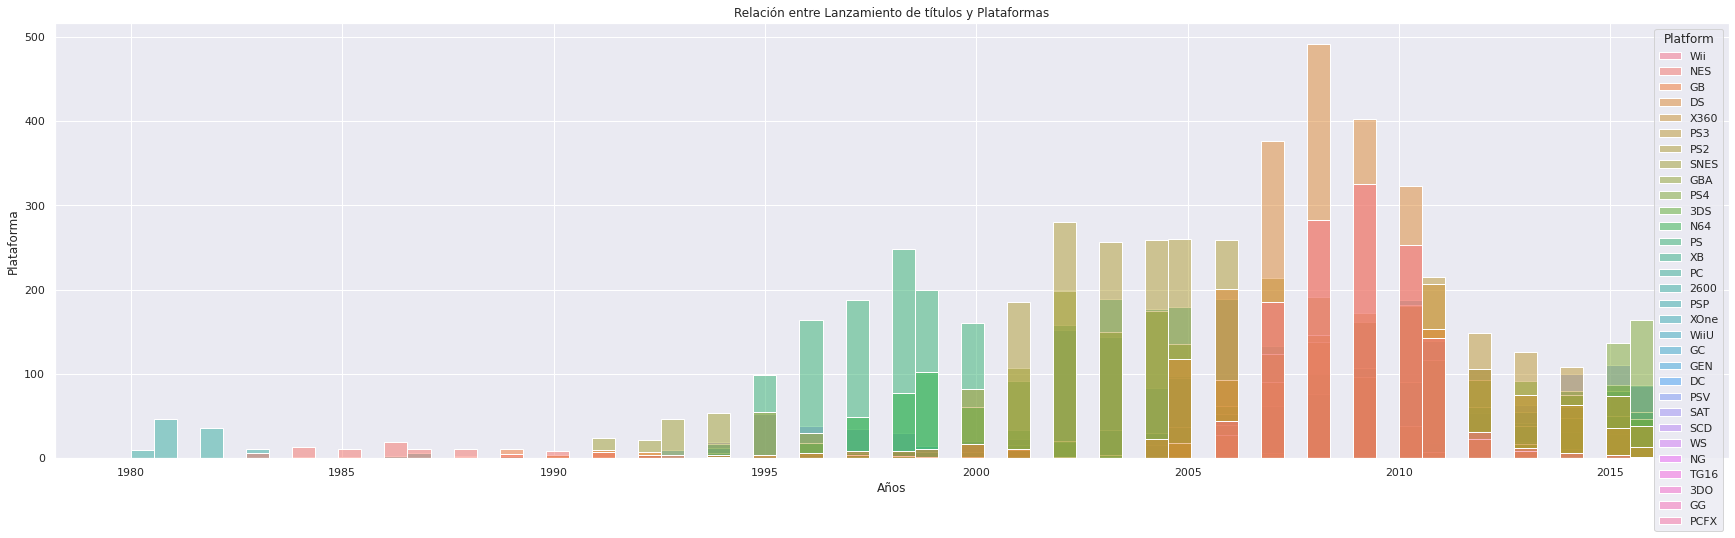

In [ ]:
# Hacemos un subset
vgamesales_dfg6 = vgamesales

# Limpiamos la data que sea mayor al 2016
vgamesales_dfg6 = vgamesales_dfg6.loc[vgamesales_dfg6['Year_of_Release'] <= 2016]
vgamesales_dfg6 = vgamesales_dfg6.dropna(subset=['Year_of_Release'])

# Axis-level
sns.set(rc={'figure.figsize':(30,8)})
sns.histplot(data=vgamesales_dfg6, x="Year_of_Release", hue="Platform")
plt.xlabel("Años")
plt.ylabel("Plataforma")
plt.title("Relación entre Lanzamiento de títulos y Plataformas")

# Incorporamos el índice de correlación y el resumen estadístico
print('Resumen estadístico:\n',vgamesales_dfg6.describe())

#### Preguntas e Interpretación
Podemos observar que a medida que avanza el tiempo los lanzamientos de videojuegos con sus respectivas plataformas tienen en promedio una duración de 5 años alcanzando su auge en el tercer año. Esto es relevante si consideramos que las ventas de un videojuego van a estar asociadas a la vigencia de la plataforma en particular.

**Pregunta**: ¿Es posible asegurar qué plataforma en qué plataforma debería desarrollarse el proyecto para asegurar mayores ventas?

**Respuesta**: Con la data existente y teniendo en cuenta el análisis anterior, se puede aseverar que plataformas como PS4 deberían dar un mayor nivel de ventas en los años venideros. Sin embargo, dado que la data no considera información de años posteriores al 2016, no resulta tan relevante para la resolución del problema. La incorporación de data más actualizada podría aportar a la incorporación de esta variable al modelo predictivo.

## Hipótesis y preguntas de interés

---

### Relación entre las ventas globales y el puntaje de la crítica

#### Hipótesis

La lógica sugiere que existe una relación directa entre las ventas totales que logra un videojuego y el puntaje logrado mediante la crítica especializada. Esto, considerando quedicha crítica supone un punto de comparación relativamente imparcial a la hora de influir en la decisión de compra de un consumidor de videojuegos.

#### Análisis de datos

Índice de correlación: 0.81


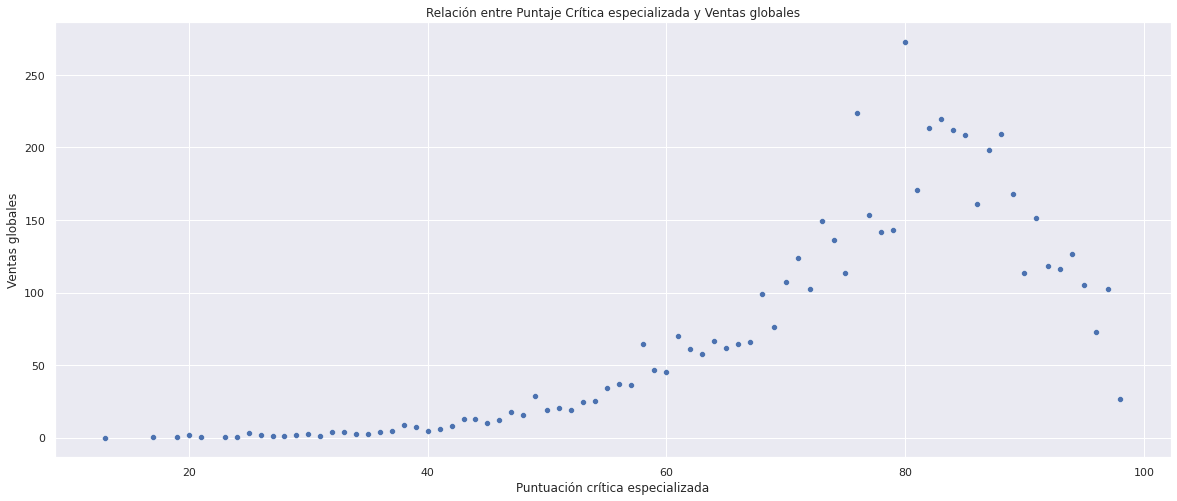

In [ ]:
# Hacemos un subset donde queden solamente los videojuegos con puntaje otorgado por la crítica especializada de forma agrupada
vgamesales_dfh1 = vgamesales_df.dropna(subset=['Critic_Score'])
vgamesales_dfh1 = vgamesales_dfh1.astype({'Critic_Score':'int'}) 
vgamesales_dfh1 = vgamesales_dfh1[['Critic_Score','Global_Sales']]
vgamesales_dfh1 = vgamesales_dfh1.groupby('Critic_Score').sum()

# Graficamos un scatterplot para identificar si existe alguna tendencia visible
sns.set(rc={'figure.figsize':(20,8)})
sns.scatterplot(data=vgamesales_dfh1, x="Critic_Score", y="Global_Sales")
plt.xlabel("Puntuación crítica especializada")
plt.ylabel("Ventas globales (en millones de unidades)")
plt.title("Relación entre Puntaje Crítica especializada y Ventas globales")

# Observamos como se comporta el coeficiente de correlación entre ambas variables
print('Índice de correlación:',round(np.corrcoef(vgamesales_dfh1.Global_Sales, vgamesales_dfh1.index)[0,1],2))

#### Interpretación de resultados

En base al gráfico, podemos apreciar que existe un comportamiento exponencial entre la puntuación de la crítica especializada y las ventas globales. Sin embargo, es necesario considerar que se está mirando de forma agregada las ventas totales por puntaje de la crítica. Esto sugiere que se pueden estar capturando outliers en los montos agrupados, lo cual puede explicar, en parte, que exista una alta correlación. Es por esto que se vuelve necesario un análisis caso a caso para poder validar la hipótesis inicial.

#### Validación de Hipótesis

Índice de correlación: -0.42


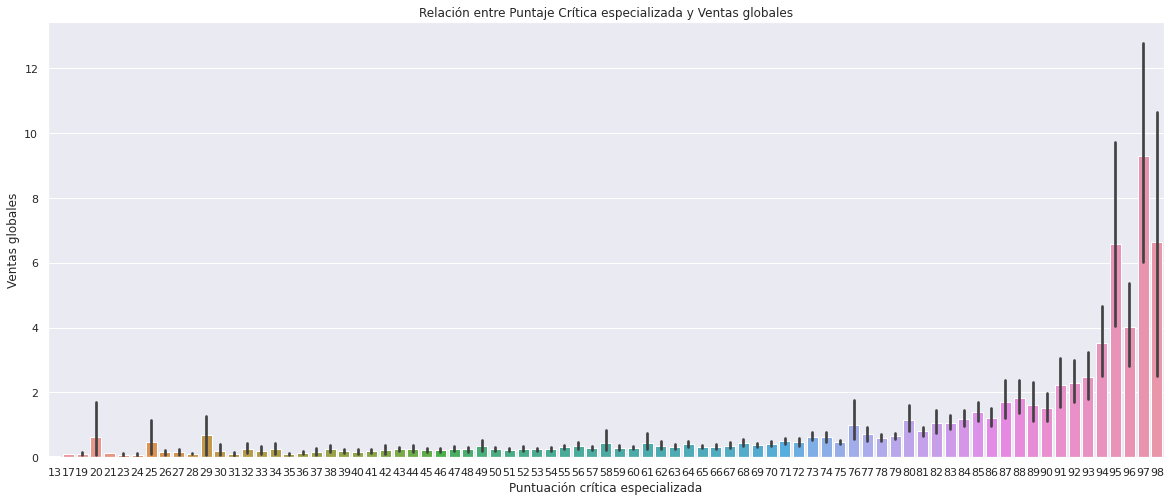

In [ ]:
# Hacemos otro subset donde queden solamente los videojuegos con puntaje otorgado por la crítica especializada 
vgamesales_dfh2 = vgamesales_df.dropna(subset=['Critic_Score'])
vgamesales_dfh2 = vgamesales_dfh2.astype({'Critic_Score':'int'}) 
vgamesales_dfh2 = vgamesales_dfh2[['Critic_Score','Global_Sales']]

# Graficamos un barplot para identificar si existe alguna tendencia visible
sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(data=vgamesales_dfh2, x="Critic_Score", y="Global_Sales")
plt.xlabel("Puntuación crítica especializada")
plt.ylabel("Ventas globales (en millones de unidades)")
plt.title("Relación entre Puntaje Crítica especializada y Ventas globales")

# Observamos como se comporta el coeficiente de correlación entre ambas variables
print('Índice de correlación:',round(np.corrcoef(vgamesales_dfh2.Global_Sales, vgamesales_dfh2.index)[0,1],2))

#### Conclusión

Podemos concluir que a nivel desagregado no existe una correlación lo suficientemente fuerte como para determinar que una mayor puntuación de la crítica especializada significa que existan mayores ventas globales. Además, considerando el gráfico de barras podemos apreciar que se sostiene el crecimiento exponencial visto el el scatterplot inicial, no obstante, en el último gráfico, se puede ver que existe una mayor dispersión de los datos a medida que la puntuación de la crítica aumenta. 

Otro punto a considerar es que la cantidad de registros bajó de 16.450 a 7.983 al momento de filtrar solamente los videojuegos que tienen puntuación de la crítica. El hecho de dejar tantos registros fuera, podría ser perjudicial a la hora de querer determinar ventas futuras. Por lo que, para trabajos posteriores, considerando también la poca correlación existente entre las variables observadas en el segundo análisis, incluir esta variable sería contraproducente.

A pesar de estos resultados, si es posible determinar que, en términos promedio, existiría una mayor cantidad de ventas a medida que la puntuación de la crítica es mayor. 

Sería interesante ver como afecta la incorporación de las críticas de los usuarios, el tipo de género del videojuego en particular y la desagregación de las ventas por región en este análisis. Lo anterior fue visto de analizado anteriormente y tuvo resultados prometedores en términos de correlación respecto a las ventas globales, por lo que su incorporación como variables predictivas puede ser positivo.

## Selección de Variables

Para el caso que debemos resolver, supondremos que el género del videojuego a desarrollar en el proyecto corresponde al género de Acción. Dicho esto, procedemos a realizar la selección de variables.

In [9]:
# Definimos un subset para trabajar la selección de variables

vgamesales_set = vgamesales
vgamesales_set = vgamesales_set.loc[vgamesales_set['Year_of_Release'] <= 2016]
vgamesales_set = vgamesales_set.dropna(subset=['Year_of_Release'])
vgamesales_set['Year_of_Release'] = pd.to_datetime(vgamesales_set['Year_of_Release'], format="%Y")
vgamesales_set = vgamesales_set[["Platform","Year_of_Release","Genre","Global_Sales","Critic_Score","User_Score"]]
vgamesales_set = vgamesales_set.loc[vgamesales_set['Genre'] <= "Action"] 
vgamesales_set = vgamesales_set.groupby(['Year_of_Release'])['Global_Sales'].sum()
vgamesales_set = pd.DataFrame(vgamesales_set)
vgamesales_set

,Global_Sales
Year_of_Release,
1980-01-01,0.34
1981-01-01,14.84
1982-01-01,6.52
1983-01-01,2.86
1984-01-01,1.85
1985-01-01,3.52
1986-01-01,13.74
1987-01-01,1.12
1988-01-01,1.75


Considerando que las correlaciones más fuertes eran entre las variables de ventas entre sí, consideraremos las ventas globales de forma aislada por año para poder generar un modelo inicial. Además incorporaremos rezagos, dado que en el análisis exploratorio de datos se observó un comportamiento creciente a nivel de ventas por año. Inicialmente incorporaremos rezagos de 1 y 2 años.

In [10]:
# Rezagos

vgamesales_set['Lag_1'] = vgamesales_set['Global_Sales'].shift(1)
vgamesales_set['Lag_2'] = vgamesales_set['Global_Sales'].shift(2)

# Rellenamos los NaN con 0
vgamesales_set['Lag_1'] = vgamesales_set['Lag_1'].fillna(0)
vgamesales_set['Lag_2'] = vgamesales_set['Lag_2'].fillna(0)

vgamesales_set

,Global_Sales,Lag_1,Lag_2
Year_of_Release,,,
1980-01-01,0.34,0.00,0.00
1981-01-01,14.84,0.34,0.00
1982-01-01,6.52,14.84,0.34
1983-01-01,2.86,6.52,14.84
1984-01-01,1.85,2.86,6.52
1985-01-01,3.52,1.85,2.86
1986-01-01,13.74,3.52,1.85
1987-01-01,1.12,13.74,3.52
1988-01-01,1.75,1.12,13.74


## Modelamiento

Dado que nuestro dataframe está representado como una serie de tiempo, utilizaremos una regresión lineal para hacer nuestro modelo.

In [ ]:
vgamesales_set_x = vgamesales_set[['Lag_1', 'Lag_2']]

vgamesales_set_y = vgamesales_set.Global_Sales

x_train, x_test, y_train, y_test = train_test_split(vgamesales_set_x, vgamesales_set_y, test_size=0.3)

x_train

,Lag_1,Lag_2
Year_of_Release,,
2000-01-01,27.77,39.44
1994-01-01,1.81,3.83
1980-01-01,0.00,0.00
2003-01-01,86.76,59.39
2012-01-01,116.76,115.49
2016-01-01,72.04,97.30
1985-01-01,1.85,2.86
2009-01-01,135.01,104.97
2007-01-01,66.13,85.53


In [ ]:
x_test

,Lag_1,Lag_2
Year_of_Release,,
1988-01-01,1.12,13.74
1989-01-01,1.75,1.12
2006-01-01,85.53,76.25
2005-01-01,76.25,67.93
2008-01-01,104.97,66.13
1981-01-01,0.34,0.00
1986-01-01,3.52,1.85
1999-01-01,39.44,27.58
1987-01-01,13.74,3.52


R2 0.8540863288523255
mae 12.91747340183158
mse 242.95824278391072
rmse 15.587117847245228


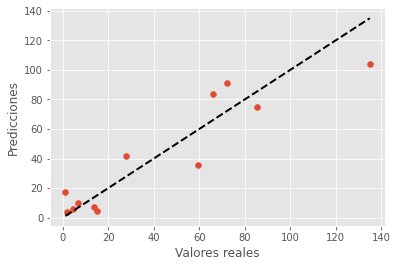

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Aplicamos el modelo

lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)

# Calculámos las métricas de evaluación

print('R2', r2_score(y_test, y_pred))
print('mae', mean_absolute_error(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))
print('rmse', (mean_squared_error(y_test, y_pred))**(1/2))

# Graficamos las predicciones contra los valores reales para tener una noción visual de la capacidad predictiva del modelo
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")

# Agregamos una línea x=y para visualizar mejor que cuantía de predicciones están sobrevaluadas y cuáles están subevaluadas
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

## Interpretación de Resultados y Conclusión

Luego de la predicción, podemos observar que el modelo tiene un buen nivel de ajuste con un R2 de 0,85. 

Mediante el Error Absoluto Medio (MAE), podemos observar que no existe una gran diferencia entre los valores predecidos y los valrores reales. Esto se sustenta en parte por el Error Cuadrático Medio (MSE) y por la Raiz del Error Cuadrático Medio (RMSE), dónde no se observan diferencias tan cuantiosas para descartar el modelo. 

El desafío sería observar cómo se comporta este modelo frente a otros modelos y ver si existe sobreajuste en el modelo actual o no. De todas formas, a modo inicial, el modelo tuvo un desempeño aceptable.

Por lo tanto, el modelo con las variables utilizadas y la metodología empleada, fue suficiente para generar una predicción correcta en cierto grado.

## Comparación con otros modelos

Incluiremos otros modelos predictivos para comparar la capacidad predictiva de nuestro modelo inicial (Regresión Lineal). Para ello, consideraremos 3 modelos. Estos son:

*   Regresión Polinómica: A diferencia de la regresión lineal, utiliza polinomios para describir la relación de variables.
*   Random Forest: Es un modelo de aprendizaje supervisado que utiliza varios árboles de decisión para hacer predicciones.
*   Redes Neuronales Recurrente: Es un modelo de aprendizaje profundo que utiliza una red neuronal recurrente para hacer predicciones en una serie de tiempo.

R2 0.827239990376062
mae 13.565303380785181
mse 287.65960058042475
rmse 16.960530669186763


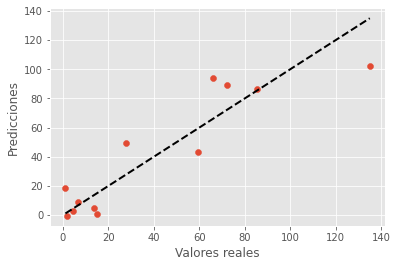

In [ ]:
# Regresión Polinómica

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Creamos un modelo de regresión polinómica con grado 2
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly, y_train)

# Predecimos
y_pred = regressor.predict(poly_reg.transform(x_test))

# Calculámos las métricas de evaluación

print('R2', r2_score(y_test, y_pred))
print('mae', mean_absolute_error(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))
print('rmse', (mean_squared_error(y_test, y_pred))**(1/2))

# Graficamos las predicciones contra los valores reales para tener una noción visual de la capacidad predictiva del modelo
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")

# Agregamos una línea x=y para visualizar mejor que cuantía de predicciones están sobrevaluadas y cuáles están subevaluadas
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

R2 0.8407059989814516
mae 12.63833333333334
mse 265.23759061833346
rmse 16.286116498979535


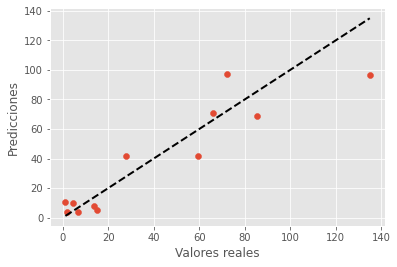

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

# Creamos un modelo de Random Forest
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

# Predecimos
y_pred = regressor.predict(x_test)

# Calculámos las métricas de evaluación

print('R2', r2_score(y_test, y_pred))
print('mae', mean_absolute_error(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))
print('rmse', (mean_squared_error(y_test, y_pred))**(1/2))

# Graficamos las predicciones contra los valores reales para tener una noción visual de la capacidad predictiva del modelo
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")

# Agregamos una línea x=y para visualizar mejor que cuantía de predicciones están sobrevaluadas y cuáles están subevaluadas
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 4753.4126
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 4745.3574
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 4737.4019
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 4729.5396
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 4721.7612
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 4714.0454
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 4706.3618
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 4698.6782
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 4690.9570
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 4683.1582
Epoch 11/100
1/1 [==============================] - 0s 13ms/step - loss: 4675.2393
Epoch 12/100
1/1 [==============================] - 0s 15ms/step - loss: 4667.1611
Epoch 13/100
1/

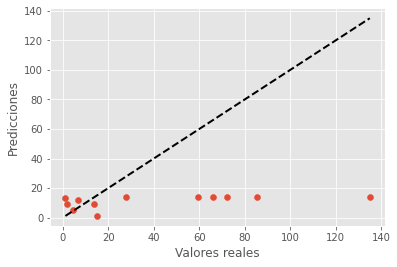

In [ ]:
# Redes Neuronales Recurrentes

from keras.models import Sequential
from keras.layers import Dense, LSTM

# Creamos un modelo de redes Neuronales
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(LSTM(units=50))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(np.array(x_train), np.array(y_train), epochs=100)

# Predecimos
y_pred = regressor.predict(np.array(x_test))

# Calculámos las métricas de evaluación

print('R2', r2_score(y_test, y_pred))
print('mae', mean_absolute_error(y_test, y_pred))
print('mse', mean_squared_error(y_test, y_pred))
print('rmse', (mean_squared_error(y_test, y_pred))**(1/2))

# Graficamos las predicciones contra los valores reales para tener una noción visual de la capacidad predictiva del modelo
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")

# Agregamos una línea x=y para visualizar mejor que cuantía de predicciones están sobrevaluadas y cuáles están subevaluadas
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

## Conclusiones sobre los modelos

En los primeros 2 ejemplos podemos ver que tuvimos resultados muy similares en comparación a cuando utilizamos regresión lineal. Esto era esperable dado que tienen cracaterísticas similares en sus fundamentos.

Ahora, cuando utilizamos redes neuronales, vemos que los resultados obtenidos son malos y no permiten predecir bien, más aún cuando se trata de predecir valores muy grandes. 

Esto sugiere que el uso de este modelo no se ajusta lo suficientemente bien a la naturaleza de nuestros datos, por lo tanto no deberíamos usarla o habría que transformar la data desde su inicio a algo que sea más ajustado al modelo.